<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/TENSORFLOW/blob/main/cnn_introduction_to_transfer_learning(model_comparision).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir="/content/drive/MyDrive/archdata/seg_train/seg_train/"
test_dir ="/content/drive/MyDrive/archive/seg_test/seg_test"

import os
import random
import pathlib
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as imimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


data_dir= pathlib.Path(train_dir)
class_label=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_label



# View an image


def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), len(class_label))

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (150, 150, 3)


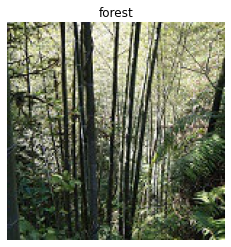

In [ ]:
random_images = random.sample(os.listdir(train_dir), len(class_label))

for i in range(len(class_label)):
    label=random_images[i]


# View a random image from the training dataset
img = view_random_image(target_dir=train_dir,
                        target_class=label)

In [ ]:
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

train_data=train_datagen.flow_from_directory(train_dir,
                                            shuffle=True,
                                           target_size=(150,150),
                                           class_mode='categorical',
                                           batch_size=32)
test_data=test_datagen.flow_from_directory(test_dir,
                                           shuffle=True,
                                           target_size=(150,150),
                                           class_mode='categorical',
                                           batch_size=32)

Found 727 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
model_4 = tf.keras.models.Sequential([
                                      
                         Conv2D(100, 6, activation='relu', input_shape=(150,150, 3)),
                         Conv2D(100, 6, activation='relu'),
                         
                         MaxPool2D(),
                         Conv2D(100, 6, activation='relu'),
                         Conv2D(100, 6, activation='relu'),
                         MaxPool2D(),
                         Conv2D(100, 6, activation='relu'),
                         Conv2D(100, 6, activation='relu'),
                        
                       
                         MaxPool2D(),
                         Flatten(),
                         Dense(6, activation='softmax')
])
                        

In [ ]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 145, 145, 100)     10900     
                                                                 
 conv2d_1 (Conv2D)           (None, 140, 140, 100)     360100    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 70, 70, 100)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 65, 65, 100)       360100    
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 100)       360100    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 100)      0         
 2D)                                                    

In [ ]:

# Compile the model
model_4.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
23/23 [==============================] - 819s 37s/step - loss: 1.8987 - accuracy: 0.2105 - val_loss: 1.7952 - val_accuracy: 0.1457
Epoch 2/5
23/23 [==============================] - 31s 1s/step - loss: 1.7399 - accuracy: 0.2215 - val_loss: 1.8402 - val_accuracy: 0.1920
Epoch 3/5
23/23 [==============================] - 32s 1s/step - loss: 1.6748 - accuracy: 0.2806 - val_loss: 1.5565 - val_accuracy: 0.2890
Epoch 4/5
23/23 [==============================] - 32s 1s/step - loss: 1.5950 - accuracy: 0.3315 - val_loss: 1.5514 - val_accuracy: 0.3257
Epoch 5/5
23/23 [==============================] - 32s 1s/step - loss: 1.5221 - accuracy: 0.4003 - val_loss: 1.5106 - val_accuracy: 0.3607


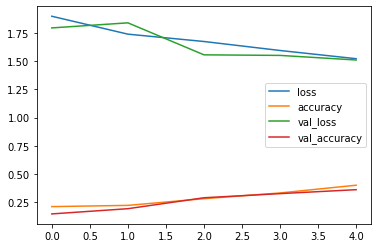

In [ ]:
pd.DataFrame(history_4.history).plot()

In [ ]:
model_4.evaluate(test_data)

94/94 [==============================] - 14s 144ms/step - loss: 1.5106 - accuracy: 0.3607


[1.5106356143951416, 0.3606666624546051]

## we will use ready made model(transfer learning):
#### data is overfitted val loss is increasing and val accuracy is incerasing.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import datetime
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
INPUT_SHAPE= (224,224)
BATCH_SIZE=32

In [ ]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# # New: EfficientNetB0 feature vector (version 2)
# efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

In [ ]:
train_dir="/content/drive/MyDrive/archdata/seg_train/seg_train/"
test_dir ="/content/drive/MyDrive/archive/seg_test/seg_test"

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

print('Training Images:')
train_data_per = train_datagen.flow_from_directory(train_dir,
                                                       target_size=INPUT_SHAPE,
                                                           batch_size=BATCH_SIZE,
                                                               class_mode='categorical' )
print('test image')
test_data=test_datagen.flow_from_directory(test_dir,
                                            target_size=INPUT_SHAPE,
                                                     batch_size=BATCH_SIZE,
                                                          class_mode='categorical')


Training Images:
Found 727 images belonging to 6 classes.
test image
Found 3000 images belonging to 6 classes.


In [ ]:
def create_callback(dir,experiment):
    log_dir= dir +"/"+ experiment +"/" + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
    tb_call=tf.keras.callbacks.TensorBoard(log_dir)
    print(f'Saving Tensorboard log file to:{log_dir}')
    return tb_call

In [ ]:
import tensorflow_hub as hub
from tensorflow.keras import  layers
import tensorflow as tf

In [ ]:
def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=INPUT_SHAPE+(3,)) 
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  return model


In [ ]:
# Create model
resnet_model = create_model(resnet_url, num_classes=train_data_per.num_classes)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
# Fit the model
resnet_history = resnet_model.fit(train_data_per,
                                  epochs=10,
                                  steps_per_epoch=len(train_data_per),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                            callbacks=create_callback(dir="/content/drive/MyDrive/archive/tensor",
                                                                            experiment='RESNET'))

Saving Tensorboard log file to:/content/drive/MyDrive/archive/tensor/RESNET/20220208-062026
Epoch 1/10
23/23 [==============================] - 22s 965ms/step - loss: 0.1120 - accuracy: 0.9766 - val_loss: 0.3315 - val_accuracy: 0.8770
Epoch 2/10
23/23 [==============================] - 21s 934ms/step - loss: 0.0966 - accuracy: 0.9862 - val_loss: 0.3127 - val_accuracy: 0.8887
Epoch 3/10
23/23 [==============================] - 21s 934ms/step - loss: 0.0844 - accuracy: 0.9849 - val_loss: 0.3123 - val_accuracy: 0.8890
Epoch 4/10
23/23 [==============================] - 21s 935ms/step - loss: 0.0763 - accuracy: 0.9890 - val_loss: 0.3099 - val_accuracy: 0.8923
Epoch 5/10
23/23 [==============================] - 21s 935ms/step - loss: 0.0675 - accuracy: 0.9904 - val_loss: 0.3206 - val_accuracy: 0.8860
Epoch 6/10
23/23 [==============================] - 21s 960ms/step - loss: 0.0609 - accuracy: 0.9917 - val_loss: 0.3200 - val_accuracy: 0.8877
Epoch 7/10
23/23 [==============================] 

In [ ]:
resnet_model.evaluate(test_data)

94/94 [==============================] - 20s 214ms/step - loss: 0.3150 - accuracy: 0.8893


[0.31497690081596375, 0.8893333077430725]

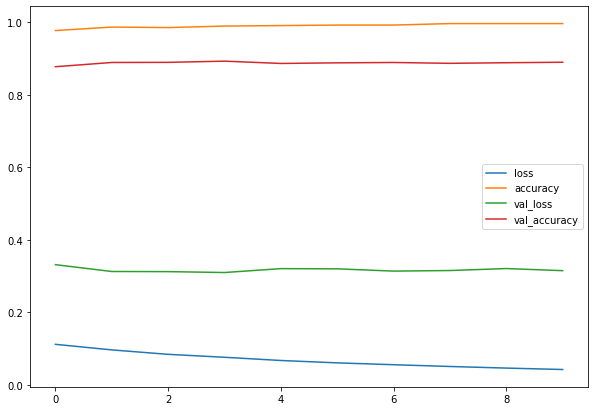

In [ ]:
pd.DataFrame(resnet_history.history).plot(figsize=(10,7))